# Datathon 1: Beginners: Taxpayer's Political Party

#### Data Description
        HHI: Household income
        HHDL: Household debt level
        Married: There are three categories for a taxpayer 0, 1, 2 with regards to marriage.
        PoliticalParty: Name of the political party
        CollegeGrads: Grade in College out of 5
        AHHAge: Average household age
        cars: number of cars in house
        Filed in YYYY: Tax filed in given year YYYY

In [102]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [142]:
data = pd.read_csv("Taxpayer's Political Party.csv")
data.head(10)

,Unnamed: 0,HHI,HHDL,Married,CollegGrads,AHHAge,Cars,Filed in 2017,Filed in 2016,Filed in 2015,PoliticalParty
0,61,183414,-12402,1,2,28,1,0,0,1,Democrat
1,501,129786,700251,2,5,63,3,0,0,0,Republican
2,658,268343,493411,2,4,44,1,1,0,1,Independent
3,703,290506,-433408,1,1,28,5,1,0,1,Republican
4,702,90108,907135,1,3,57,5,1,1,0,Democrat
5,461,83914,693246,1,4,66,0,1,0,0,Independent
6,618,144029,-332420,0,3,90,2,0,1,0,Democrat
7,5,157274,-472337,0,1,28,1,1,0,1,Independent
8,261,153930,494379,1,2,40,0,0,1,1,Independent
9,436,116951,560163,0,5,50,1,0,0,1,Republican


In [136]:
data.PoliticalParty.value_counts()

Independent    269
Democrat       269
Republican     265
Name: PoliticalParty, dtype: int64

In [138]:
data.loc[:, ['Filed in 2017', 'Filed in 2016', 'Filed in 2015']].sum()

Filed in 2017    407
Filed in 2016    409
Filed in 2015    415
dtype: int64

In [140]:
data['Filed in 2017'].value_counts()

1    407
0    396
Name: Filed in 2017, dtype: int64

<AxesSubplot:xlabel='HHI', ylabel='HHDL'>

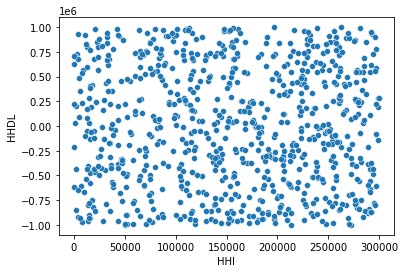

In [141]:
sns.scatterplot(x = data['HHI'], y = data['HHDL'])

In [104]:
data.shape

(803, 11)

In [105]:
data.isnull().sum()

Unnamed: 0        0
HHI               0
HHDL              0
Married           0
CollegGrads       0
AHHAge            0
Cars              0
Filed in 2017     0
Filed in 2016     0
Filed in 2015     0
PoliticalParty    0
dtype: int64

C:\Users\User\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='PoliticalParty', ylabel='count'>

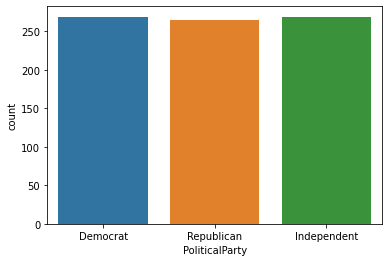

In [106]:
sns.countplot(data.PoliticalParty)

In [143]:
x = data.drop('PoliticalParty', axis = 'columns')
y = data['PoliticalParty']
x.shape

(803, 10)

In [144]:
party_map = {'Democrat':1, 'Republican':2,'Independent':3}
y = y.map(party_map)
y.head()

0    1
1    2
2    3
3    2
4    1
Name: PoliticalParty, dtype: int64

In [145]:
x.drop('Unnamed: 0', inplace = True, axis = 'columns')

In [110]:
from sklearn.preprocessing import StandardScaler 
scaler = StandardScaler()
x = scaler.fit_transform(x)

In [146]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 1)
x_test.shape

(161, 9)

In [147]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
logreg.fit(x_train, y_train)
logreg_pred = logreg.predict(x_test)


In [148]:
from sklearn.metrics import accuracy_score
score = accuracy_score(y_test, logreg_pred) 
print(score)

0.2795031055900621


In [112]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV
gbc = GradientBoostingClassifier()
parameters = {
    'n_estimators': [80, 90, 100, 125, 150],
    'max_depth': [2,3,4,5,8,16,None],
    'learning_rate': [0.03, 0.1, 0.3, 0.5]
}
cv = GridSearchCV(gbc, parameters, cv=5, n_jobs = -1, verbose = 2)
cv.fit(x_train, y_train)



Fitting 5 folds for each of 140 candidates, totalling 700 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:    3.3s
[Parallel(n_jobs=-1)]: Done 138 tasks      | elapsed:   20.2s
[Parallel(n_jobs=-1)]: Done 341 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done 624 tasks      | elapsed:  1.7min
[Parallel(n_jobs=-1)]: Done 700 out of 700 | elapsed:  2.2min finished


GridSearchCV(cv=5, estimator=GradientBoostingClassifier(), n_jobs=-1,
             param_grid={'learning_rate': [0.03, 0.1, 0.3, 0.5],
                         'max_depth': [2, 3, 4, 5, 8, 16, None],
                         'n_estimators': [80, 90, 100, 125, 150]},
             verbose=2)

In [113]:
cv.best_params_

{'learning_rate': 0.5, 'max_depth': 8, 'n_estimators': 125}

In [114]:
cv.best_score_

0.4182567049808429

In [115]:
gbc1 = GradientBoostingClassifier(learning_rate = 0.5, max_depth = 8, n_estimators = 125)
gbc1.fit(x_train, y_train)
y_pred_gbc = gbc1.predict(x_test)

In [116]:
from sklearn.metrics import classification_report

report = classification_report(y_test, y_pred_gbc)
print(report)

              precision    recall  f1-score   support

           1       0.34      0.32      0.33        31
           2       0.28      0.38      0.32        21
           3       0.39      0.31      0.35        29

    accuracy                           0.33        81
   macro avg       0.34      0.34      0.33        81
weighted avg       0.34      0.33      0.33        81



In [117]:
test = pd.read_csv('test.csv')

In [119]:
test.head()

,Unnamed: 0,HHI,HHDL,Married,CollegGrads,AHHAge,Cars,Filed in 2017,Filed in 2016,Filed in 2015
0,17,253274,-633752,2,1,94,3,0,1,1
1,590,47107,322850,0,1,30,2,1,1,0
2,224,111874,300583,0,2,46,3,0,1,1
3,960,96670,107419,0,3,77,5,0,0,0
4,57,128669,341273,0,0,92,4,1,1,1


In [120]:
test.drop('Unnamed: 0', inplace = True, axis = 'columns')

In [123]:
prediction = gbc1.predict(test)

In [125]:
predictions = []
for i in prediction:
    if i == 1:
        predictions.append('Democrat')
    elif i == 2:
        predictions.append('Republican')
    else:
        predictions.append('Independent')


In [126]:
predictions

['Independent',
 'Independent',
 'Independent',
 'Independent',
 'Independent',
 'Independent',
 'Republican',
 'Independent',
 'Independent',
 'Republican']

In [134]:
predict = pd.DataFrame({'prediction':predictions})
predict.head()

,prediction
0,Independent
1,Independent
2,Independent
3,Independent
4,Independent


In [135]:
predict.to_csv('predictions.csv')

In [53]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV
param_grid = { 
    'n_estimators': [200, 500, 800],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [4,5,6,7,8, 9, 10],
    'criterion' :['gini', 'entropy']
}

rfc = RandomForestClassifier()
CV_rfc = GridSearchCV(estimator=rfc, param_grid=param_grid, cv= 5, n_jobs = -1, verbose = 1)
CV_rfc.fit(x_train, y_train)

Fitting 5 folds for each of 126 candidates, totalling 630 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:    5.0s
[Parallel(n_jobs=-1)]: Done 176 tasks      | elapsed:   18.3s
[Parallel(n_jobs=-1)]: Done 426 tasks      | elapsed:   42.1s
[Parallel(n_jobs=-1)]: Done 630 out of 630 | elapsed:  1.1min finished


GridSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [4, 5, 6, 7, 8, 9, 10],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'n_estimators': [200, 500, 800]},
             verbose=1)

In [ ]:
y_pred = CV_rfc.predict(x_test)

In [54]:
CV_rfc.best_score_

0.3947222222222222

In [55]:
from sklearn.metrics import classification_report
y_pred = CV_rfc.predict(x_test)
report = classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

           1       0.34      0.32      0.33        31
           2       0.25      0.38      0.30        21
           3       0.20      0.14      0.16        29

    accuracy                           0.27        81
   macro avg       0.26      0.28      0.27        81
weighted avg       0.27      0.27      0.26        81



In [79]:
from sklearn.svm import SVC
svc = SVC()

In [80]:
param_grid = {'C': [0.1,1, 10], 'gamma': [1,0.1,0.01],'kernel': ['rbf', 'poly', 'sigmoid']}
CV_svc = GridSearchCV(estimator=svc, param_grid=param_grid, cv= 5, n_jobs = -1, verbose = 3)
CV_svc.fit(x_train, y_train)

Fitting 5 folds for each of 27 candidates, totalling 135 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   8 tasks      | elapsed:    2.3s
[Parallel(n_jobs=-1)]: Done 112 out of 135 | elapsed:    3.4s remaining:    0.6s
[Parallel(n_jobs=-1)]: Done 135 out of 135 | elapsed:  1.5min finished


GridSearchCV(cv=5, estimator=SVC(), n_jobs=-1,
             param_grid={'C': [0.1, 1, 10], 'gamma': [1, 0.1, 0.01],
                         'kernel': ['rbf', 'poly', 'sigmoid']},
             verbose=3)

In [81]:
CV_svc.best_score_

0.36834291187739465